Convolutional Neural Network (CNN) implementation for Diabetic Retinopathy Detection 
https://www.kaggle.com/c/diabetic-retinopathy-detection/data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array 
from keras import regularizers
from keras import optimizers

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

I have already downloaded the dataset from Kaggle.
I have noted all the steps to download the database in a seperate file.
Below I am loading a CSV file containing training labels 

In [3]:
df_csv = pd.read_csv('/storage/trainLabels.csv')

In [4]:
df_csv['image'] = df_csv['image'].astype(str) + '.jpeg'

Lets take a look at all the labels.
'10_left' is a name of the file whereas '0/1/2/3/4' are the labels
'10_left' image of the left eye
'10_right' image of the right eye for the same person

There are 35125 images in the training set, 'level' is the column indicating the labels for its respective images

In [5]:
df_csv.tail()

,image,level
35121,44347_right.jpeg,0
35122,44348_left.jpeg,0
35123,44348_right.jpeg,0
35124,44349_left.jpeg,0
35125,44349_right.jpeg,1


We will use Pandas to convert df_train into a series.
and get_dummies to do one hot encoding (FYI, I am not using one hot encoding during training as of now)

In [6]:
!find /storage/train/ -size 0 -print

In [7]:
#!ls -1 >> /storage/name.txt

In [8]:
df = pd.read_table('/storage/name.txt',  header=None)

In [9]:
df.columns = ['name']

In [10]:
df.tail()

,name
31974,6483_left.jpeg
31975,6483_right.jpeg
31976,6484_left.jpeg
31977,6484_right.jpeg
31978,6488_left.jpeg


In [11]:
df_train = df_csv[df_csv.image.isin(df.name.values)]

In [12]:
df_train.tail()

,image,level
35121,44347_right.jpeg,0
35122,44348_left.jpeg,0
35123,44348_right.jpeg,0
35124,44349_left.jpeg,0
35125,44349_right.jpeg,1


In [13]:
df_train.shape

(31979, 2)

As I said before there are 5 types of labels 0/1/2/3/4, thry are distinguished as below
NDPR - Non Proliferative Diabetic Retinopathy

Class	 Name
0	    Normal	
1	    Mild NPDR
2	    Moderate NPDR
3	    Severe NPDR	
4	    PDR

If you are interested to check all image names

In [14]:
i = 0 
for f, breed in tqdm(df_train.values):
    print(f)


  4%|▍         | 1326/31979 [00:00<00:02, 10496.90it/s]

10_left.jpeg
10_right.jpeg
13_left.jpeg
13_right.jpeg
15_left.jpeg
15_right.jpeg
16_left.jpeg
16_right.jpeg
17_left.jpeg
17_right.jpeg
19_left.jpeg
19_right.jpeg
20_left.jpeg
20_right.jpeg
21_left.jpeg
21_right.jpeg
22_left.jpeg
22_right.jpeg
23_left.jpeg
23_right.jpeg
25_left.jpeg
25_right.jpeg
30_left.jpeg
30_right.jpeg
31_left.jpeg
31_right.jpeg
33_left.jpeg
33_right.jpeg
36_left.jpeg
36_right.jpeg
40_left.jpeg
40_right.jpeg
41_left.jpeg
41_right.jpeg
42_left.jpeg
42_right.jpeg
46_left.jpeg
46_right.jpeg
47_left.jpeg
47_right.jpeg
49_left.jpeg
49_right.jpeg
51_left.jpeg
51_right.jpeg
52_left.jpeg
52_right.jpeg
54_left.jpeg
54_right.jpeg
56_left.jpeg
56_right.jpeg
57_left.jpeg
57_right.jpeg
58_left.jpeg
58_right.jpeg
59_left.jpeg
59_right.jpeg
60_left.jpeg
60_right.jpeg
62_left.jpeg
62_right.jpeg
100_left.jpeg
100_right.jpeg
102_left.jpeg
102_right.jpeg
104_left.jpeg
104_right.jpeg
108_left.jpeg
108_right.jpeg
111_left.jpeg
111_right.jpeg
114_left.jpeg
114_right.jpeg
115_left.jpeg
11

 10%|█         | 3321/31979 [00:00<00:03, 9123.12it/s] 


2893_left.jpeg
2893_right.jpeg
2895_left.jpeg
2895_right.jpeg
2897_left.jpeg
2897_right.jpeg
2901_left.jpeg
2901_right.jpeg
2903_left.jpeg
2903_right.jpeg
2905_left.jpeg
2905_right.jpeg
2908_left.jpeg
2908_right.jpeg
2910_left.jpeg
2910_right.jpeg
2911_left.jpeg
2911_right.jpeg
2916_left.jpeg
2916_right.jpeg
2918_left.jpeg
2918_right.jpeg
2923_left.jpeg
2923_right.jpeg
2933_left.jpeg
2933_right.jpeg
2946_left.jpeg
2946_right.jpeg
2947_left.jpeg
2947_right.jpeg
2949_left.jpeg
2949_right.jpeg
2952_left.jpeg
2952_right.jpeg
2953_left.jpeg
2953_right.jpeg
2954_left.jpeg
2954_right.jpeg
2956_left.jpeg
2956_right.jpeg
2957_left.jpeg
2957_right.jpeg
2961_left.jpeg
2961_right.jpeg
2962_left.jpeg
2962_right.jpeg
2963_left.jpeg
2963_right.jpeg
2964_left.jpeg
2964_right.jpeg
2965_left.jpeg
2965_right.jpeg
2966_left.jpeg
2966_right.jpeg
2969_left.jpeg
2969_right.jpeg
2970_left.jpeg
2970_right.jpeg
2972_left.jpeg
2972_right.jpeg
2973_left.jpeg
2973_right.jpeg
2976_left.jpeg
2976_right.jpeg
2978_le

 17%|█▋        | 5317/31979 [00:00<00:03, 8812.64it/s]

5180_right.jpeg
5183_left.jpeg
5183_right.jpeg
5185_left.jpeg
5185_right.jpeg
5186_left.jpeg
5186_right.jpeg
5192_left.jpeg
5192_right.jpeg
5194_left.jpeg
5194_right.jpeg
5196_left.jpeg
5196_right.jpeg
5198_left.jpeg
5198_right.jpeg
5200_left.jpeg
5200_right.jpeg
5201_left.jpeg
5201_right.jpeg
5203_left.jpeg
5203_right.jpeg
5205_left.jpeg
5205_right.jpeg
5209_left.jpeg
5209_right.jpeg
5212_left.jpeg
5212_right.jpeg
5213_left.jpeg
5213_right.jpeg
5215_left.jpeg
5215_right.jpeg
5219_left.jpeg
5219_right.jpeg
5220_left.jpeg
5220_right.jpeg
5227_left.jpeg
5227_right.jpeg
5233_left.jpeg
5233_right.jpeg
5237_left.jpeg
5237_right.jpeg
5240_left.jpeg
5240_right.jpeg
5241_left.jpeg
5241_right.jpeg
5243_left.jpeg
5243_right.jpeg
5245_left.jpeg
5245_right.jpeg
5250_left.jpeg
5250_right.jpeg
5255_left.jpeg
5255_right.jpeg
5257_left.jpeg
5257_right.jpeg
5258_left.jpeg
5258_right.jpeg
5259_left.jpeg
5259_right.jpeg
5260_left.jpeg
5260_right.jpeg
5267_left.jpeg
5267_right.jpeg
5274_left.jpeg
5274_rig

 20%|█▉        | 6314/31979 [00:00<00:02, 8932.59it/s]

10963_right.jpeg
10966_left.jpeg
10966_right.jpeg
10969_left.jpeg
10969_right.jpeg
10970_left.jpeg
10970_right.jpeg
10974_left.jpeg
10974_right.jpeg
10975_left.jpeg
10975_right.jpeg
10976_left.jpeg
10976_right.jpeg
10977_left.jpeg
10977_right.jpeg
10983_left.jpeg
10983_right.jpeg
10987_left.jpeg
10987_right.jpeg
10988_left.jpeg
10988_right.jpeg
10989_left.jpeg
10989_right.jpeg
10994_left.jpeg
10994_right.jpeg
10996_left.jpeg
10996_right.jpeg
11003_left.jpeg
11003_right.jpeg
11005_left.jpeg
11005_right.jpeg
11007_left.jpeg
11007_right.jpeg
11008_left.jpeg
11008_right.jpeg
11010_left.jpeg
11010_right.jpeg
11013_left.jpeg
11013_right.jpeg
11023_left.jpeg
11023_right.jpeg
11026_left.jpeg
11026_right.jpeg
11031_left.jpeg
11031_right.jpeg
11032_left.jpeg
11032_right.jpeg
11035_left.jpeg
11035_right.jpeg
11037_left.jpeg
11037_right.jpeg
11040_left.jpeg
11040_right.jpeg
11041_left.jpeg
11041_right.jpeg
11043_left.jpeg
11043_right.jpeg
11048_left.jpeg
11048_right.jpeg
11049_left.jpeg
11049_righ

 26%|██▌       | 8306/31979 [00:00<00:02, 8985.40it/s]

13162_right.jpeg
13167_left.jpeg
13167_right.jpeg
13169_left.jpeg
13169_right.jpeg
13170_left.jpeg
13170_right.jpeg
13173_left.jpeg
13173_right.jpeg
13175_left.jpeg
13175_right.jpeg
13176_left.jpeg
13176_right.jpeg
13177_left.jpeg
13177_right.jpeg
13178_left.jpeg
13178_right.jpeg
13180_left.jpeg
13180_right.jpeg
13184_left.jpeg
13184_right.jpeg
13186_left.jpeg
13186_right.jpeg
13188_left.jpeg
13188_right.jpeg
13189_left.jpeg
13189_right.jpeg
13190_left.jpeg
13190_right.jpeg
13192_left.jpeg
13192_right.jpeg
13196_left.jpeg
13196_right.jpeg
13201_left.jpeg
13201_right.jpeg
13206_left.jpeg
13206_right.jpeg
13209_left.jpeg
13209_right.jpeg
13210_left.jpeg
13210_right.jpeg
13211_left.jpeg
13211_right.jpeg
13212_left.jpeg
13212_right.jpeg
13213_left.jpeg
13213_right.jpeg
13214_left.jpeg
13214_right.jpeg
13220_left.jpeg
13220_right.jpeg
13222_left.jpeg
13222_right.jpeg
13229_left.jpeg
13229_right.jpeg
13230_left.jpeg
13230_right.jpeg
13234_left.jpeg
13234_right.jpeg
13237_left.jpeg
13237_righ

 31%|███       | 9991/31979 [00:01<00:02, 8484.48it/s]

15322_left.jpeg
15322_right.jpeg
15323_left.jpeg
15323_right.jpeg
15324_left.jpeg
15324_right.jpeg
15325_left.jpeg
15325_right.jpeg
15335_left.jpeg
15335_right.jpeg
15336_left.jpeg
15336_right.jpeg
15337_left.jpeg
15337_right.jpeg
15339_left.jpeg
15339_right.jpeg
15340_left.jpeg
15340_right.jpeg
15343_left.jpeg
15343_right.jpeg
15347_left.jpeg
15347_right.jpeg
15351_left.jpeg
15351_right.jpeg
15353_left.jpeg
15353_right.jpeg
15354_left.jpeg
15354_right.jpeg
15360_left.jpeg
15360_right.jpeg
15366_left.jpeg
15366_right.jpeg
15368_left.jpeg
15368_right.jpeg
15369_left.jpeg
15369_right.jpeg
15375_left.jpeg
15375_right.jpeg
15376_left.jpeg
15376_right.jpeg
15380_left.jpeg
15380_right.jpeg
15383_left.jpeg
15383_right.jpeg
15385_left.jpeg
15385_right.jpeg
15387_left.jpeg
15387_right.jpeg
15388_left.jpeg
15388_right.jpeg
15394_left.jpeg
15394_right.jpeg
15396_left.jpeg
15396_right.jpeg
15397_left.jpeg
15397_right.jpeg
15402_left.jpeg
15402_right.jpeg
15408_left.jpeg
15408_right.jpeg
15410_left

 37%|███▋      | 11971/31979 [00:01<00:02, 9153.31it/s]

17494_right.jpeg
17495_left.jpeg
17495_right.jpeg
17501_left.jpeg
17501_right.jpeg
17504_left.jpeg
17504_right.jpeg
17506_left.jpeg
17506_right.jpeg
17509_left.jpeg
17509_right.jpeg
17510_left.jpeg
17510_right.jpeg
17511_left.jpeg
17511_right.jpeg
17515_left.jpeg
17515_right.jpeg
17517_left.jpeg
17517_right.jpeg
17520_left.jpeg
17520_right.jpeg
17522_left.jpeg
17522_right.jpeg
17526_left.jpeg
17526_right.jpeg
17533_left.jpeg
17533_right.jpeg
17540_left.jpeg
17540_right.jpeg
17543_left.jpeg
17543_right.jpeg
17546_left.jpeg
17546_right.jpeg
17548_left.jpeg
17548_right.jpeg
17550_left.jpeg
17550_right.jpeg
17555_left.jpeg
17555_right.jpeg
17561_left.jpeg
17561_right.jpeg
17564_left.jpeg
17564_right.jpeg
17567_left.jpeg
17567_right.jpeg
17568_left.jpeg
17568_right.jpeg
17571_left.jpeg
17571_right.jpeg
17578_left.jpeg
17578_right.jpeg
17581_left.jpeg
17581_right.jpeg
17586_left.jpeg
17586_right.jpeg
17591_left.jpeg
17591_right.jpeg
17592_left.jpeg
17592_right.jpeg
17600_left.jpeg
17600_righ

 43%|████▎     | 13796/31979 [00:01<00:02, 8494.45it/s]


19749_right.jpeg
19753_left.jpeg
19753_right.jpeg
19754_left.jpeg
19754_right.jpeg
19755_left.jpeg
19755_right.jpeg
19762_left.jpeg
19762_right.jpeg
19766_left.jpeg
19766_right.jpeg
19770_left.jpeg
19770_right.jpeg
19771_left.jpeg
19771_right.jpeg
19773_left.jpeg
19773_right.jpeg
19778_left.jpeg
19778_right.jpeg
19782_left.jpeg
19782_right.jpeg
19784_left.jpeg
19784_right.jpeg
19788_left.jpeg
19788_right.jpeg
19789_left.jpeg
19789_right.jpeg
19792_left.jpeg
19792_right.jpeg
19793_left.jpeg
19793_right.jpeg
19800_left.jpeg
19800_right.jpeg
19802_left.jpeg
19802_right.jpeg
19803_left.jpeg
19803_right.jpeg
19806_left.jpeg
19806_right.jpeg
19810_left.jpeg
19810_right.jpeg
19811_left.jpeg
19811_right.jpeg
19812_left.jpeg
19812_right.jpeg
19813_left.jpeg
19813_right.jpeg
19815_left.jpeg
19815_right.jpeg
19821_left.jpeg
19821_right.jpeg
19823_left.jpeg
19823_right.jpeg
19828_left.jpeg
19828_right.jpeg
19830_left.jpeg
19830_right.jpeg
19839_left.jpeg
19839_right.jpeg
19840_left.jpeg
19840_rig

 49%|████▉     | 15792/31979 [00:01<00:01, 8373.77it/s]


22268_left.jpeg
22268_right.jpeg
22271_left.jpeg
22271_right.jpeg
22272_left.jpeg
22272_right.jpeg
22274_left.jpeg
22274_right.jpeg
22275_left.jpeg
22275_right.jpeg
22278_left.jpeg
22278_right.jpeg
22280_left.jpeg
22280_right.jpeg
22283_left.jpeg
22283_right.jpeg
22286_left.jpeg
22286_right.jpeg
22287_left.jpeg
22287_right.jpeg
22291_left.jpeg
22291_right.jpeg
22298_left.jpeg
22298_right.jpeg
22299_left.jpeg
22299_right.jpeg
22306_left.jpeg
22306_right.jpeg
22307_left.jpeg
22307_right.jpeg
22310_left.jpeg
22310_right.jpeg
22314_left.jpeg
22314_right.jpeg
22315_left.jpeg
22315_right.jpeg
22321_left.jpeg
22321_right.jpeg
22323_left.jpeg
22323_right.jpeg
22327_left.jpeg
22327_right.jpeg
22328_left.jpeg
22328_right.jpeg
22330_left.jpeg
22330_right.jpeg
22332_left.jpeg
22332_right.jpeg
22334_left.jpeg
22334_right.jpeg
22338_left.jpeg
22338_right.jpeg
22341_left.jpeg
22341_right.jpeg
22349_left.jpeg
22349_right.jpeg
22350_left.jpeg
22350_right.jpeg
22360_left.jpeg
22360_right.jpeg
22361_lef

 55%|█████▍    | 17587/31979 [00:02<00:01, 8597.03it/s]

24314_left.jpeg
24314_right.jpeg
24317_left.jpeg
24317_right.jpeg
24318_left.jpeg
24318_right.jpeg
24325_left.jpeg
24325_right.jpeg
24327_left.jpeg
24327_right.jpeg
24328_left.jpeg
24328_right.jpeg
24334_left.jpeg
24334_right.jpeg
24335_left.jpeg
24335_right.jpeg
24336_left.jpeg
24336_right.jpeg
24339_left.jpeg
24339_right.jpeg
24340_left.jpeg
24340_right.jpeg
24341_left.jpeg
24341_right.jpeg
24343_left.jpeg
24343_right.jpeg
24346_left.jpeg
24346_right.jpeg
24353_left.jpeg
24353_right.jpeg
24355_left.jpeg
24355_right.jpeg
24367_left.jpeg
24367_right.jpeg
24368_left.jpeg
24368_right.jpeg
24369_left.jpeg
24369_right.jpeg
24378_left.jpeg
24378_right.jpeg
24381_left.jpeg
24381_right.jpeg
24384_left.jpeg
24384_right.jpeg
24386_left.jpeg
24386_right.jpeg
24387_left.jpeg
24387_right.jpeg
24391_left.jpeg
24391_right.jpeg
24392_left.jpeg
24392_right.jpeg
24393_left.jpeg
24393_right.jpeg
24394_left.jpeg
24394_right.jpeg
24397_left.jpeg
24397_right.jpeg
24398_left.jpeg
24398_right.jpeg
24401_left

 61%|██████    | 19477/31979 [00:02<00:01, 8419.27it/s]


26536_right.jpeg
26539_left.jpeg
26539_right.jpeg
26540_left.jpeg
26540_right.jpeg
26541_left.jpeg
26541_right.jpeg
26542_left.jpeg
26542_right.jpeg
26543_left.jpeg
26543_right.jpeg
26545_left.jpeg
26545_right.jpeg
26546_left.jpeg
26546_right.jpeg
26547_left.jpeg
26547_right.jpeg
26553_left.jpeg
26553_right.jpeg
26564_left.jpeg
26564_right.jpeg
26569_left.jpeg
26569_right.jpeg
26570_left.jpeg
26570_right.jpeg
26573_left.jpeg
26573_right.jpeg
26576_left.jpeg
26576_right.jpeg
26580_left.jpeg
26580_right.jpeg
26581_left.jpeg
26581_right.jpeg
26582_left.jpeg
26582_right.jpeg
26583_left.jpeg
26583_right.jpeg
26584_left.jpeg
26584_right.jpeg
26586_left.jpeg
26586_right.jpeg
26590_left.jpeg
26590_right.jpeg
26591_left.jpeg
26591_right.jpeg
26592_left.jpeg
26592_right.jpeg
26594_left.jpeg
26594_right.jpeg
26595_left.jpeg
26595_right.jpeg
26596_left.jpeg
26596_right.jpeg
26597_left.jpeg
26597_right.jpeg
26601_left.jpeg
26601_right.jpeg
26602_left.jpeg
26602_right.jpeg
26610_left.jpeg
26610_rig

 64%|██████▎   | 20328/31979 [00:02<00:01, 8440.85it/s]

28701_right.jpeg
28711_left.jpeg
28711_right.jpeg
28713_left.jpeg
28713_right.jpeg
28716_left.jpeg
28716_right.jpeg
28721_left.jpeg
28721_right.jpeg
28722_left.jpeg
28722_right.jpeg
28726_left.jpeg
28726_right.jpeg
28729_left.jpeg
28729_right.jpeg
28731_left.jpeg
28731_right.jpeg
28732_left.jpeg
28732_right.jpeg
28734_left.jpeg
28734_right.jpeg
28737_left.jpeg
28737_right.jpeg
28738_left.jpeg
28738_right.jpeg
28743_left.jpeg
28743_right.jpeg
28752_left.jpeg
28752_right.jpeg
28754_left.jpeg
28754_right.jpeg
28756_left.jpeg
28756_right.jpeg
28758_left.jpeg
28758_right.jpeg
28760_left.jpeg
28760_right.jpeg
28762_left.jpeg
28762_right.jpeg
28768_left.jpeg
28768_right.jpeg
28770_left.jpeg
28770_right.jpeg
28772_left.jpeg
28772_right.jpeg
28774_left.jpeg
28774_right.jpeg
28776_left.jpeg
28776_right.jpeg
28779_left.jpeg
28779_right.jpeg
28780_left.jpeg
28780_right.jpeg
28781_left.jpeg
28781_right.jpeg
28782_left.jpeg
28782_right.jpeg
28786_left.jpeg
28786_right.jpeg
28788_left.jpeg
28788_righ

 70%|██████▉   | 22276/31979 [00:02<00:01, 8343.61it/s]

30885_right.jpeg
30888_left.jpeg
30888_right.jpeg
30889_left.jpeg
30889_right.jpeg
30891_left.jpeg
30891_right.jpeg
30892_left.jpeg
30892_right.jpeg
30893_left.jpeg
30893_right.jpeg
30894_left.jpeg
30894_right.jpeg
30897_left.jpeg
30897_right.jpeg
30898_left.jpeg
30898_right.jpeg
30899_left.jpeg
30899_right.jpeg
30900_left.jpeg
30900_right.jpeg
30903_left.jpeg
30903_right.jpeg
30904_left.jpeg
30904_right.jpeg
30906_left.jpeg
30906_right.jpeg
30909_left.jpeg
30909_right.jpeg
30910_left.jpeg
30910_right.jpeg
30911_left.jpeg
30911_right.jpeg
30912_left.jpeg
30912_right.jpeg
30913_left.jpeg
30913_right.jpeg
30914_left.jpeg
30914_right.jpeg
30915_left.jpeg
30915_right.jpeg
30919_left.jpeg
30919_right.jpeg
30922_left.jpeg
30922_right.jpeg
30923_left.jpeg
30923_right.jpeg
30925_left.jpeg
30925_right.jpeg
30926_left.jpeg
30926_right.jpeg
30928_left.jpeg
30928_right.jpeg
30930_left.jpeg
30930_right.jpeg
30935_left.jpeg
30935_right.jpeg
30937_left.jpeg
30937_right.jpeg
30938_left.jpeg
30938_righ

 76%|███████▌  | 24271/31979 [00:02<00:00, 8338.89it/s]

33019_left.jpeg
33019_right.jpeg
33025_left.jpeg
33025_right.jpeg
33027_left.jpeg
33027_right.jpeg
33028_left.jpeg
33028_right.jpeg
33030_left.jpeg
33030_right.jpeg
33031_left.jpeg
33031_right.jpeg
33032_left.jpeg
33032_right.jpeg
33033_left.jpeg
33033_right.jpeg
33037_left.jpeg
33037_right.jpeg
33043_left.jpeg
33043_right.jpeg
33046_left.jpeg
33046_right.jpeg
33049_left.jpeg
33049_right.jpeg
33062_left.jpeg
33062_right.jpeg
33065_left.jpeg
33065_right.jpeg
33068_left.jpeg
33068_right.jpeg
33070_left.jpeg
33070_right.jpeg
33072_left.jpeg
33072_right.jpeg
33074_left.jpeg
33074_right.jpeg
33076_left.jpeg
33076_right.jpeg
33077_left.jpeg
33077_right.jpeg
33080_left.jpeg
33080_right.jpeg
33081_left.jpeg
33081_right.jpeg
33082_left.jpeg
33082_right.jpeg
33083_left.jpeg
33083_right.jpeg
33085_left.jpeg
33085_right.jpeg
33088_left.jpeg
33088_right.jpeg
33092_left.jpeg
33092_right.jpeg
33094_left.jpeg
33094_right.jpeg
33095_left.jpeg
33095_right.jpeg
33096_left.jpeg
33096_right.jpeg
33099_left

 82%|████████▏ | 26143/31979 [00:03<00:00, 8477.93it/s]

35357_left.jpeg
35357_right.jpeg
35365_left.jpeg
35365_right.jpeg
35367_left.jpeg
35367_right.jpeg
35368_left.jpeg
35368_right.jpeg
35371_left.jpeg
35371_right.jpeg
35374_left.jpeg
35374_right.jpeg
35376_left.jpeg
35376_right.jpeg
35377_left.jpeg
35377_right.jpeg
35378_left.jpeg
35378_right.jpeg
35380_left.jpeg
35380_right.jpeg
35383_left.jpeg
35383_right.jpeg
35388_left.jpeg
35388_right.jpeg
35389_left.jpeg
35389_right.jpeg
35392_left.jpeg
35392_right.jpeg
35394_left.jpeg
35394_right.jpeg
35395_left.jpeg
35395_right.jpeg
35396_left.jpeg
35396_right.jpeg
35398_left.jpeg
35398_right.jpeg
35402_left.jpeg
35402_right.jpeg
35403_left.jpeg
35403_right.jpeg
35405_left.jpeg
35405_right.jpeg
35406_left.jpeg
35406_right.jpeg
35412_left.jpeg
35412_right.jpeg
35414_left.jpeg
35414_right.jpeg
35417_left.jpeg
35417_right.jpeg
35420_left.jpeg
35420_right.jpeg
35421_left.jpeg
35421_right.jpeg
35422_left.jpeg
35422_right.jpeg
35427_left.jpeg
35427_right.jpeg
35428_left.jpeg
35428_right.jpeg
35429_left

 87%|████████▋ | 27929/31979 [00:03<00:00, 8607.49it/s]

37330_left.jpeg
37330_right.jpeg
37331_left.jpeg
37331_right.jpeg
37332_left.jpeg
37332_right.jpeg
37337_left.jpeg
37337_right.jpeg
37338_left.jpeg
37338_right.jpeg
37339_left.jpeg
37339_right.jpeg
37340_left.jpeg
37340_right.jpeg
37345_left.jpeg
37345_right.jpeg
37346_left.jpeg
37346_right.jpeg
37347_left.jpeg
37347_right.jpeg
37350_left.jpeg
37350_right.jpeg
37353_left.jpeg
37353_right.jpeg
37354_left.jpeg
37354_right.jpeg
37359_left.jpeg
37359_right.jpeg
37360_left.jpeg
37360_right.jpeg
37362_left.jpeg
37362_right.jpeg
37364_left.jpeg
37364_right.jpeg
37365_left.jpeg
37365_right.jpeg
37366_left.jpeg
37366_right.jpeg
37369_left.jpeg
37369_right.jpeg
37372_left.jpeg
37372_right.jpeg
37374_left.jpeg
37374_right.jpeg
37378_left.jpeg
37378_right.jpeg
37382_left.jpeg
37382_right.jpeg
37383_left.jpeg
37383_right.jpeg
37385_left.jpeg
37385_right.jpeg
37387_left.jpeg
37387_right.jpeg
37389_left.jpeg
37389_right.jpeg
37394_left.jpeg
37394_right.jpeg
37395_left.jpeg
37395_right.jpeg
37399_left

 94%|█████████▍| 30072/31979 [00:03<00:00, 9153.46it/s]


39834_right.jpeg
39841_left.jpeg
39841_right.jpeg
39847_left.jpeg
39847_right.jpeg
39848_left.jpeg
39848_right.jpeg
39852_left.jpeg
39852_right.jpeg
39854_left.jpeg
39854_right.jpeg
39855_left.jpeg
39855_right.jpeg
39858_left.jpeg
39858_right.jpeg
39860_left.jpeg
39860_right.jpeg
39863_left.jpeg
39863_right.jpeg
39864_left.jpeg
39864_right.jpeg
39867_left.jpeg
39867_right.jpeg
39869_left.jpeg
39869_right.jpeg
39874_left.jpeg
39874_right.jpeg
39876_left.jpeg
39876_right.jpeg
39878_left.jpeg
39878_right.jpeg
39880_left.jpeg
39880_right.jpeg
39881_left.jpeg
39881_right.jpeg
39882_left.jpeg
39882_right.jpeg
39885_left.jpeg
39885_right.jpeg
39891_left.jpeg
39891_right.jpeg
39898_left.jpeg
39898_right.jpeg
39899_left.jpeg
39899_right.jpeg
39902_left.jpeg
39902_right.jpeg
39906_left.jpeg
39906_right.jpeg
39908_left.jpeg
39908_right.jpeg
39909_left.jpeg
39909_right.jpeg
39912_left.jpeg
39912_right.jpeg
39914_left.jpeg
39914_right.jpeg
39915_left.jpeg
39915_right.jpeg
39917_left.jpeg
39917_rig

100%|██████████| 31979/31979 [00:03<00:00, 8660.68it/s]


42178_right.jpeg
42179_left.jpeg
42179_right.jpeg
42183_left.jpeg
42183_right.jpeg
42184_left.jpeg
42184_right.jpeg
42187_left.jpeg
42187_right.jpeg
42189_left.jpeg
42189_right.jpeg
42191_left.jpeg
42191_right.jpeg
42192_left.jpeg
42192_right.jpeg
42194_left.jpeg
42194_right.jpeg
42196_left.jpeg
42196_right.jpeg
42197_left.jpeg
42197_right.jpeg
42199_left.jpeg
42199_right.jpeg
42200_left.jpeg
42200_right.jpeg
42204_left.jpeg
42204_right.jpeg
42206_left.jpeg
42206_right.jpeg
42207_left.jpeg
42207_right.jpeg
42208_left.jpeg
42208_right.jpeg
42210_left.jpeg
42210_right.jpeg
42212_left.jpeg
42212_right.jpeg
42213_left.jpeg
42213_right.jpeg
42216_left.jpeg
42216_right.jpeg
42217_left.jpeg
42217_right.jpeg
42219_left.jpeg
42219_right.jpeg
42223_left.jpeg
42223_right.jpeg
42224_left.jpeg
42224_right.jpeg
42229_left.jpeg
42229_right.jpeg
42233_left.jpeg
42233_right.jpeg
42235_left.jpeg
42235_right.jpeg
42237_left.jpeg
42237_right.jpeg
42238_left.jpeg
42238_right.jpeg
42239_left.jpeg
42239_rig

IF you plan to run this code on all 35125 images then replace df_test with df_train.
This code sneppet will load all the images and labels into a numpy array.
You can also load images using OpenCV, I will mention the code OpenCV code in comments

In [16]:
TrainData = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True)

In [17]:
ValidData = ImageDataGenerator(
    horizontal_flip=True)

Its important to split the whole dataset into training and validation dataset apart from testing dataset which we have seperately.

In [ ]:
train, valid = train_test_split(df_train, test_size=0.1, random_state=1)

In [18]:
train_generator = TrainData.flow_from_dataframe(
            dataframe=df_train[:28000], directory="/storage/train/", 
            x_col="image", y_col="level", 
            class_mode="other", target_size=(256,256), 
            batch_size= 128)

Found 28000 images.


In [19]:
valid_generator = ValidData.flow_from_dataframe(
            dataframe=df_train[28001:], directory="/storage/train/", 
            x_col="image", y_col="level", 
            class_mode="other", target_size=(256,256), 
            batch_size=32)

Found 3978 images.


In [20]:
visible = Input(shape=(256,256,3))
conv1 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(visible)
conv2 = Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1))(conv1)
conv3 = ZeroPadding2D(padding=(1, 1))(conv2)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv3)
#bat1 = BatchNormalization(axis = 1)(pool1)

conv4 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01))(pool1)
conv5 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01))(conv4)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv5)

conv6 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(pool2)
conv7 = Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid')(conv6)
conv7 = ZeroPadding2D(padding=(1, 1))(conv7)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv7)

conv8 = Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01))(pool3)
conv9 = Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid')(conv8)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv9)

flat = Flatten()(pool4)
hidden1 = Dense(64, activation='relu')(flat)
drop1 = Dropout(0.3)(hidden1)

hidden2 = Dense(32, activation='relu')(drop1)
drop2 = Dropout(0.2)(hidden2)

output = Dense(5, activation='sigmoid')(drop2)
#output = Dense(1, activation='sigmoid')(flat)
model = Model(inputs=visible, outputs=output)

There are variety of optimizers available >> https://keras.io/optimizers/
More about loss functions >> https://keras.io/losses/
Metrics >> https://keras.io/metrics/

In [21]:
opt = optimizers.adam(lr=0.01, decay=0.0)

In [22]:
model.compile(optimizer= opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now we will define the model >>
The model has 2 convolutional leyers, 2 max pooling layes, image flattening layer and a dence layer
Models in Keras/TF come in 2 forms - Sequential (model = Sequential()) or using Funtional API
Below code is using Funtional API which is usually used for complex models, i will leave the light weight Sequential() model in comments

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 16)      2320      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 254, 254, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 123, 123, 32)      9248      
__________

In [24]:
with tf.device('/device:GPU:0'): 
    m1= model.fit_generator(
            train_generator,
            epochs=5,
            validation_data=valid_generator,
            verbose=1)

Epoch 1/5
219/219 [==============================] - 6738s 31s/step - loss: 4.8908 - acc: 0.6320 - val_loss: 4.5917 - val_acc: 0.7486
Epoch 2/5
219/219 [==============================] - 5971s 27s/step - loss: 4.4015 - acc: 0.7327 - val_loss: 4.0859 - val_acc: 0.7486
Epoch 3/5
219/219 [==============================] - 5804s 27s/step - loss: 4.5612 - acc: 0.6293 - val_loss: 1.7875 - val_acc: 0.7486
Epoch 4/5
219/219 [==============================] - 5646s 26s/step - loss: 2.0816 - acc: 0.7295 - val_loss: 1.8327 - val_acc: 0.7486
Epoch 5/5
219/219 [==============================] - 6094s 28s/step - loss: 1.8482 - acc: 0.7312 - val_loss: 1.6811 - val_acc: 0.7486


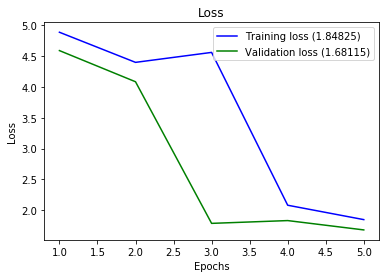

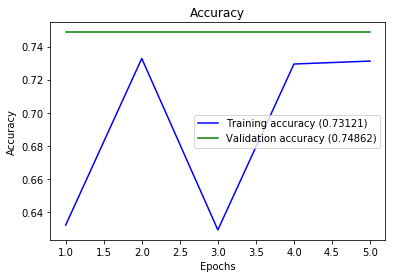

In [26]:
plot_history(m1)

In [25]:
import matplotlib.pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
     print("Default GPU Device: {}".format(tf.test.gpu_device_name()))
else:
     print("Please install GPU version of TF")